In [1]:
import matplotlib
from graf import Graf

# Nastavimo velikost grafov v Jupyter notebooku
matplotlib.rcParams['figure.figsize'] = [4, 2]

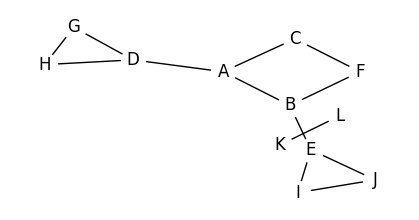

In [2]:
g = Graf({
        "A": {"B", "C", "D"},
        "B": {"A", "E", "F"},
        "C": {"A", "F"},
        "D": {"A", "G", "H"},
        "E": {"B", "I", "J"},
        "F": {"B", "C"},
        "G": {"D", "H"},
        "H": {"D", "G"},
        "I": {"E", "J"},
        "J": {"E", "I"},
        "K": {"L"},
        "L": {"K"}
    }
)
g.narisi()

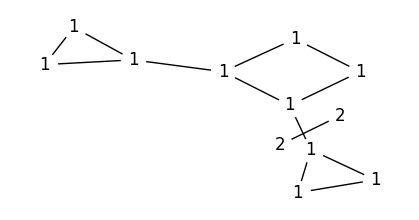

In [3]:
komponente = g.komponente_za_povezanost()
g.narisi(oznaka=komponente.get)

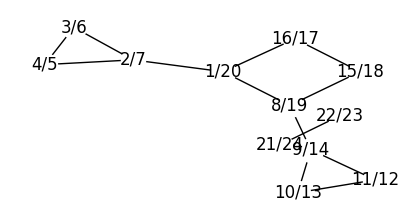

In [4]:
pred_oznake, po_oznake = g.pred_in_po_oznake()
g.narisi(oznaka=lambda v: f"{pred_oznake[v]}/{po_oznake[v]}")

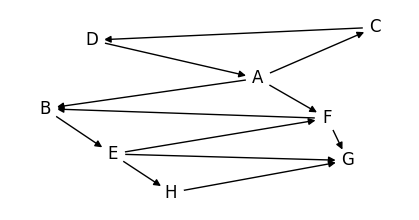

In [5]:
u = Graf({
    "A": {"B", "C", "F"},
    "B": {"E"},
    "C": {"D"},
    "D": {"A"},
    "E": {"F", "G", "H"},
    "F": {"B", "G"},
    "G": {},
    "H": {"G"},
}, usmerjen=True)
u.narisi()

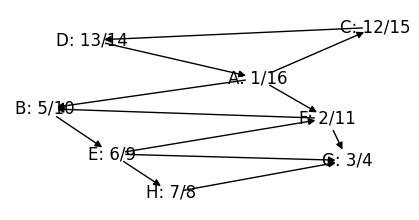

In [6]:
pred_oznake, po_oznake = u.pred_in_po_oznake()
u.narisi(oznaka=lambda v: f"{v}: {pred_oznake[v]}/{po_oznake[v]}")

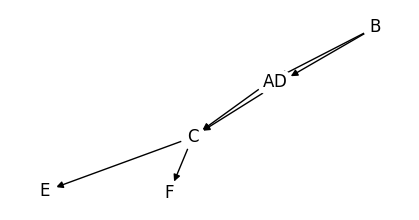

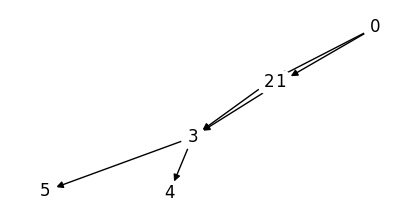

In [7]:
dag = Graf({
    "A": {"C"},
    "B": {"A", "D"},
    "C": {"E", "F"},
    "D": {"C"},
    "E": {},
    "F": {},
}, usmerjen=True)
dag.narisi()
ureditev = dag.topoloska_ureditev()
dag.narisi(oznaka=lambda v: ureditev.index(v))

In [8]:
kpk = Graf({
    "A": {"B"},
    "B": {"C", "D", "E"},
    "C": {"F"},
    "D": set(),
    "E": {"B", "F", "G"},
    "F": {"C", "H"},
    "G": {"H", "J"},
    "H": {"K"},
    "I": {"G"},
    "J": {"I"},
    "K": {"L"},
    "L": {"J"},
}, usmerjen=True)

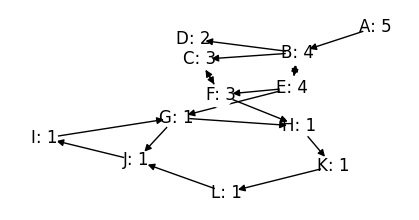

In [13]:

komponente = kpk.krepko_povezane_komponente()
kpk.narisi(oznaka=lambda v: f"{v}: {komponente[v]}")

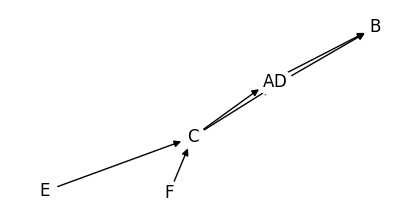

In [10]:
dag.obrnjen().narisi()

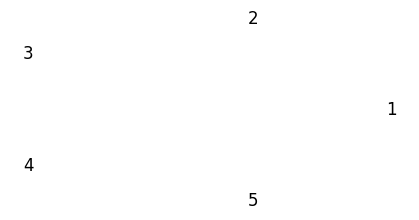

In [16]:
kpk.kvocientni_graf().narisi()

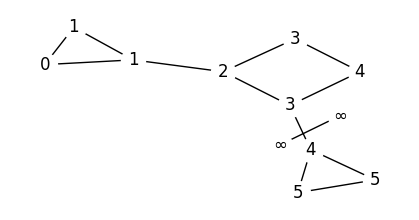

In [12]:
razdalje = g.razdalje("H")
g.narisi(oznaka=lambda v: razdalje.get(v, "∞"))